### **OBJETIVES**

1. Try to obtain key performance indicators (KPIs) for logistic lines such as On Time, In Full, On Time In Full Ratio, in order to identify the problems that arise when shipping our orders

2. Explore other metrics such as VOFR and LIFR, and try to filter by products, months, days, etc. It is important to create visual graphics to represent the metric vs. target during this exploratory data analysis (EDA).

3. Deliver our findings and critical points identified to improve our effectiveness ratios and strengthen our customer relationships to our CEO and Supply Chain Manager, in order to maintain a long-term business relationship.

### **DATA**

Our data engineering team has delivered six datasheets in .CSV format containing all logistic supply chain information. This information was recorded during fiscal year 2022 and is distributed as follows:

-	Dim_customers: This table contains all the information about customers
-	Dim_date : This table contains all the information about the products
-	Dim_products: This table contains the dates at daily, monthly level and week numbers of the year
-	Dim_targets_orders: This table contains all target data at the customer level
-	Fact_order_lines: This table contains all information about orders and each item inside the orders.
-	Fact_orders_aggregate: This table contains information about OnTime, InFull and OnTime Infull information aggregated at the order level per customer



In [2]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [3]:
dim_customers = pd.read_csv('/content/dim_customers.csv')
dim_customers.info()
dim_customers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    35 non-null     int64 
 1   customer_name  35 non-null     object
 2   city           35 non-null     object
dtypes: int64(1), object(2)
memory usage: 968.0+ bytes


customer_id      customer_name       city
0       789201          Rel Fresh      Surat
1       789202          Rel Fresh  Ahmedabad
2       789203          Rel Fresh   Vadodara
3       789301  Expression Stores      Surat
4       789303  Expression Stores   Vadodara

In [4]:
# Count the number of unique values in each column.
for columna in dim_customers.columns:
    unique_values = dim_customers[columna].nunique()
    print("Unique Values in column '", columna, "':", unique_values)

Unique Values in column ' customer_id ': 35
Unique Values in column ' customer_name ': 15
Unique Values in column ' city ': 3


-------------------------------------------------------------------------------

*In this table, we know that have market in three cities, and have fifteen customers. These distributed in thirty-five different id.*

**At this point the data analysis team will begin to explore the KPIs requested by management.**

In [8]:
# getting to know the table fact_order_lines
fact_order_lines = pd.read_csv('/content/fact_order_lines.csv')
print(fact_order_lines.info())
fact_order_lines.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57096 entries, 0 to 57095
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   order_id              57096 non-null  object
 1   order_placement_date  57096 non-null  object
 2   customer_id           57096 non-null  int64 
 3   product_id            57096 non-null  int64 
 4   order_qty             57096 non-null  int64 
 5   agreed_delivery_date  57096 non-null  object
 6   actual_delivery_date  57096 non-null  object
 7   delivery_qty          57096 non-null  int64 
 8   In Full               57096 non-null  int64 
 9   On Time               57096 non-null  int64 
 10  On Time In Full       57096 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 4.8+ MB
None


order_id    order_placement_date  customer_id  product_id  order_qty  \
0  FMR34203601  Tuesday, March 1, 2022       789203    25891601        110   
1  FMR32320302  Tuesday, March 1, 2022       789320    25891203        347   
2  FMR33320501  Tuesday, March 1, 2022       789320    25891203        187   
3  FMR34220601  Tuesday, March 1, 2022       789220    25891203        235   
4  FMR33703603  Tuesday, March 1, 2022       789703    25891203        176   

       agreed_delivery_date      actual_delivery_date  delivery_qty  In Full  \
0     Friday, March 4, 2022     Friday, March 4, 2022           110        1   
1  Wednesday, March 2, 2022  Wednesday, March 2, 2022           347        1   
2   Thursday, March 3, 2022   Thursday, March 3, 2022           150        0   
3     Friday, March 4, 2022     Friday, March 4, 2022           235        1   
4   Thursday, March 3, 2022   Thursday, March 3, 2022           176        1   

   On Time  On Time In Full  
0        1                1  
1        1                1  
2        1                0  
3        1                1  
4        1                1

In [10]:
#Total Order Lines (indicator)
TOTAL_LINES_ORDERS = fact_order_lines.order_id.count()

In [12]:
#Line Fill Rate (LIFR%) - Number of order lines shipped In Full Quantity / Total Order Lines
LIFR = round((fact_order_lines['In Full'].value_counts()[1]/TOTAL_LINES_ORDERS)*100,2)
print(f'The LIFR value is {LIFR}',"%")

The LIFR value is 65.96 %


In [13]:
#Volume Fill Rate (VOFR%) - Total Quantity shipped / Total Quantity Ordered
VOFR = round((fact_order_lines['delivery_qty'].sum()/fact_order_lines['order_qty'].sum())*100,2)
print(f'The VOFR value is {VOFR}',"%")

The VOFR value is 96.59 %


In [14]:
# getting to know the table fact_order_aggregate
fact_orders_aggregate = pd.read_csv('/content/fact_orders_aggregate.csv')
print(fact_orders_aggregate.info())
fact_orders_aggregate.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31729 entries, 0 to 31728
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   order_id              31729 non-null  object
 1   customer_id           31729 non-null  int64 
 2   order_placement_date  31729 non-null  object
 3   on_time               31729 non-null  int64 
 4   in_full               31729 non-null  int64 
 5   otif                  31729 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.5+ MB
None


order_id  customer_id order_placement_date  on_time  in_full  otif
0  FMR32103503       789103            01-Mar-22        1        0     0
1  FMR34103403       789103            01-Mar-22        1        0     0
2  FMR32103602       789103            01-Mar-22        1        0     0
3  FMR33103602       789103            01-Mar-22        1        0     0
4  FMR33103401       789103            01-Mar-22        1        0     0

In [19]:
#Create a list of measures using fact_orders_aggregate table

Total_orders = fact_orders_aggregate.order_id.count()
OT_ = round((fact_orders_aggregate.on_time.value_counts()[1]/Total_orders)*100,2) # Number of orders delivered On Time / Total Number of Orders
IF_ = round((fact_orders_aggregate.in_full.value_counts()[1]/Total_orders)*100,2) # Number of orders delivered in Full quantity / Total Number of Orders
OTIF_ = round((fact_orders_aggregate.otif.value_counts()[1]/Total_orders)*100,2) # Number of orders delivered both In Full & On Time / Total Number of Orders

print(fact_orders_aggregate.on_time.value_counts()[1])
print(f'the total quantity orders is {Total_orders}')
print(f'the OT% is {OT_} %')
print(f'the IF% is {IF_} %')
print(f'the OTIF% is {OTIF_} %')

18730
the total quantity orders is 31729
the OT% is 59.03 %
the IF% is 52.78 %
the OTIF% is 29.02 %


In [16]:
# getting to know the table dim_target_orders
dim_target_orders = pd.read_csv('/content/dim_targets_orders.csv')
print(dim_target_orders.info())
dim_target_orders.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   customer_id     35 non-null     int64
 1   ontime_target%  35 non-null     int64
 2   infull_target%  35 non-null     int64
 3   otif_target%    35 non-null     int64
dtypes: int64(4)
memory usage: 1.2 KB
None


customer_id  ontime_target%  infull_target%  otif_target%
0       789201              87              81            70
1       789202              85              81            69
2       789203              92              76            70
3       789301              89              78            69
4       789303              88              78            69

In [17]:
# Metrics to Target KPI's by customer

On_time_target = round(dim_target_orders['ontime_target%'].mean(),2)
In_full_target = round(dim_target_orders['infull_target%'].mean(),2)
Otif_target = round(dim_target_orders['otif_target%'].mean(),2)

print(f'On time target is {On_time_target} %')
print(f'In full target is {In_full_target} %')
print(f'On time in full target is {Otif_target} %')


On time target is 86.09 %
In full target is 76.51 %
On time in full target is 65.91 %


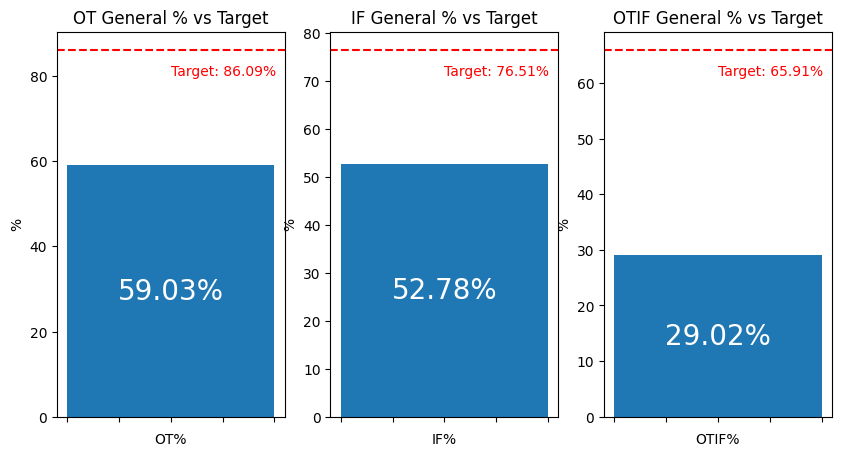

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))

# First Graph
bar_plot1 = ax1.bar(1, OT_)
height = bar_plot1[0].get_height()
ax1.text(x=1, y=height/2, s=f'{OT_}%', ha='center', va='center', fontsize=20, color='white')

ax1.axhline(y=On_time_target, color='r', linestyle='--')
ax1.set_xticklabels([])

ax1.annotate(f'Target: {On_time_target}%', xy=(1, On_time_target), xytext=(0, -10),
             ha='left', va='top', textcoords='offset points', fontsize=10, color='r')

ax1.set_xlabel('OT%')
ax1.set_ylabel('%')
ax1.set_title('OT General % vs Target')
ax1.grid(False)

# Second Graph
bar_plot2 = ax2.bar(1, IF_)
height = bar_plot2[0].get_height()
ax2.text(x=1, y=height/2, s=f'{IF_}%', ha='center', va='center', fontsize=20, color='white')

ax2.axhline(y=In_full_target, color='r', linestyle='--')
ax2.set_xticklabels([])

ax2.annotate(f'Target: {In_full_target}%', xy=(1, In_full_target), xytext=(0, -10),
             ha='left', va='top', textcoords='offset points', fontsize=10, color='r')

ax2.set_xlabel('IF%')
ax2.set_ylabel('%')
ax2.set_title('IF General % vs Target')
ax2.grid(False)

#third Graph

bar_plot3 = ax3.bar(1, OTIF_)
height = bar_plot3[0].get_height()
ax3.text(x=1, y=height/2, s=f'{OTIF_}%', ha='center', va='center', fontsize=20, color='white')

ax3.axhline(y=Otif_target, color='r', linestyle='--')
ax3.set_xticklabels([])

ax3.annotate(f'Target: {Otif_target}%', xy=(1, Otif_target), xytext=(0, -10),
             ha='left', va='top', textcoords='offset points', fontsize=10, color='r')

ax3.set_xlabel('OTIF%')
ax3.set_ylabel('%')
ax3.set_title('OTIF General % vs Target')
ax3.grid(False)

plt.show()

# **Insigth #1**

After analyzing our KPIs, we have found that our logistics chain needs to increase efforts and allocate resources to optimize shipments by an additional 50% beyond the current level, especially to ensure on-time and complete deliveries. We have observed that our OTIF indicator only reaches about ≈49% of the expected goal, leading to only ≈30% of our deliveries meeting the minimum effectiveness standard.

In [20]:
# getting to know the table dim_target_orders
dim_customers = pd.read_csv('/content/dim_customers.csv')
print(dim_customers.info())
dim_customers.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    35 non-null     int64 
 1   customer_name  35 non-null     object
 2   city           35 non-null     object
dtypes: int64(1), object(2)
memory usage: 968.0+ bytes
None


customer_id      customer_name       city
0       789201          Rel Fresh      Surat
1       789202          Rel Fresh  Ahmedabad
2       789203          Rel Fresh   Vadodara
3       789301  Expression Stores      Surat
4       789303  Expression Stores   Vadodara

In [21]:
# find diferent customers and split by cities
surat_customers = dim_customers.loc[dim_customers['city'] == 'Surat', 'customer_id']
Ahmedabad_customers = dim_customers.loc[dim_customers['city'] == 'Ahmedabad', 'customer_id']
Vadodara_customers = dim_customers.loc[dim_customers['city'] == 'Vadodara', 'customer_id']

surat_data_order_lines = fact_orders_aggregate.loc[fact_orders_aggregate['customer_id'].isin(surat_customers)]
Ahmedabad_data_order_lines = fact_orders_aggregate.loc[fact_orders_aggregate['customer_id'].isin(Ahmedabad_customers)]
Vadodara_data_order_lines = fact_orders_aggregate.loc[fact_orders_aggregate['customer_id'].isin(Vadodara_customers)]

OT_by_Surat = round((surat_data_order_lines.on_time.value_counts()[1]/surat_data_order_lines.order_id.count())*100,2)
OT_by_Ahmedabad = round((Ahmedabad_data_order_lines.on_time.value_counts()[1]/Ahmedabad_data_order_lines.order_id.count())*100,2)
OT_by_Vadodara = round((Vadodara_data_order_lines.on_time.value_counts()[1]/Vadodara_data_order_lines.order_id.count())*100,2)

IF_by_Surat = round((surat_data_order_lines.in_full.value_counts()[1]/surat_data_order_lines.order_id.count())*100,2)
IF_by_Ahmedabad = round((Ahmedabad_data_order_lines.in_full.value_counts()[1]/Ahmedabad_data_order_lines.order_id.count())*100,2)
IF_by_Vadodara = round((Vadodara_data_order_lines.in_full.value_counts()[1]/Vadodara_data_order_lines.order_id.count())*100,2)

OTIF_by_Surat = round((surat_data_order_lines.otif.value_counts()[1]/surat_data_order_lines.order_id.count())*100,2)
OTIF_by_Ahmedabad = round((Ahmedabad_data_order_lines.otif.value_counts()[1]/Ahmedabad_data_order_lines.order_id.count())*100,2)
OTIF_by_Vadodara = round((Vadodara_data_order_lines.otif.value_counts()[1]/Vadodara_data_order_lines.order_id.count())*100,2)

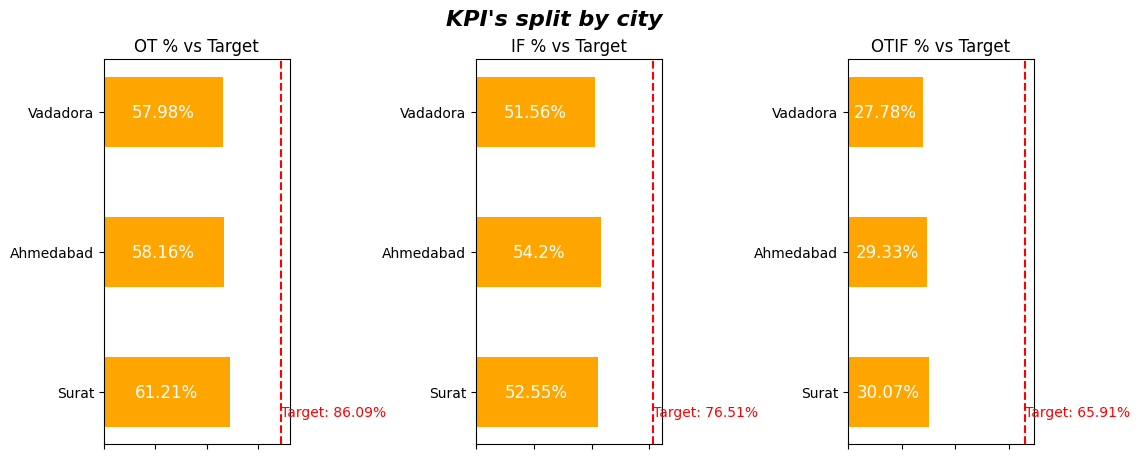

In [22]:
fig = plt.figure(figsize=(12, 5))
fig.suptitle("KPI's split by city", fontsize=16, fontweight='bold', fontstyle='italic')
spec = GridSpec(ncols=3, nrows=1, wspace = 1)
ax1 = plt.subplot(spec[0, 0])
bars1 = ax1.barh(y=[1, 2, 3], width=[OT_by_Surat, OT_by_Ahmedabad, OT_by_Vadodara], height=0.5, align='center', color='orange')

ax1.axvline(x=On_time_target, color='red', linestyle='--')
ax1.annotate(f'Target: {On_time_target}%', xy=(On_time_target, 1), xytext=(0, -10),
            ha='left', va='top', textcoords='offset points', fontsize=10, color='r')

for i, bar in enumerate(bars1):
    ax1.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, str(bar.get_width()) + '%',
            ha='center', va='center', color='white', fontsize=12)
ax1.set_xticklabels([])
ax1.set_yticks([1, 2, 3])
ax1.set_yticklabels(['Surat', 'Ahmedabad', 'Vadadora'])
ax1.set_title('OT % vs Target')
ax1.grid(False)

# Graph2
ax2 = plt.subplot(spec[0, 1])
bars2 = ax2.barh(y=[1, 2, 3], width=[IF_by_Surat, IF_by_Ahmedabad, IF_by_Vadodara], height=0.5, align='center', color='orange')

ax2.axvline(x=In_full_target, color='red', linestyle='--')
ax2.annotate(f'Target: {In_full_target}%', xy=(In_full_target, 1), xytext=(0, -10),
            ha='left', va='top', textcoords='offset points', fontsize=10, color='r')

for i, bar in enumerate(bars2):
    ax2.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, str(bar.get_width()) + '%',
            ha='center', va='center', color='white', fontsize=12)
ax2.set_xticklabels([])
ax2.set_yticks([1, 2, 3])
ax2.set_yticklabels(['Surat', 'Ahmedabad', 'Vadadora'])
ax2.set_title('IF % vs Target')
ax2.grid(False)

# Graph3
ax3 = plt.subplot(spec[0, 2])
bars3 = ax3.barh(y=[1, 2, 3], width=[OTIF_by_Surat, OTIF_by_Ahmedabad, OTIF_by_Vadodara], height=0.5, align='center', color='orange')

ax3.axvline(x=Otif_target, color='red', linestyle='--')
ax3.annotate(f'Target: {Otif_target}%', xy=(Otif_target, 1), xytext=(0, -10),
            ha='left', va='top', textcoords='offset points', fontsize=10, color='r')

for i, bar in enumerate(bars3):
    ax3.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, str(bar.get_width()) + '%',
            ha='center', va='center', color='white', fontsize=12)
ax3.set_xticklabels([])
ax3.set_yticks([1, 2, 3])
ax3.set_yticklabels(['Surat', 'Ahmedabad', 'Vadadora'])
ax3.set_title('OTIF % vs Target')
ax3.grid(False)
plt.show()


**At this point, we don't have evidence to say that cities have a direct influence on low levels of the OTIF metric. It's important to emphasize this metric. At this moment, we haven't reached 50% of our target. For this reason, we must observe our different customer accounts, and if necessary, each product.**

In [23]:
#split KPI's By customer

customers_list_by_ID = list(fact_orders_aggregate['customer_id'].value_counts().index)
customers_total_orders = dict(zip(customers_list_by_ID,fact_orders_aggregate['customer_id'].value_counts().values))

on_time_by_customer = {}
in_full_by_customer = {}
otif_by_customer = {}

for index, row in fact_orders_aggregate.iterrows():
    customer_id = row["customer_id"]
    if customer_id in customers_list_by_ID:
        on_time = row["on_time"]
        in_full = row["in_full"]
        otif = row["otif"]
        if on_time == 1:
            on_time_by_customer[customer_id] = on_time_by_customer.get(customer_id, 0) + 1
        if in_full == 1:
            in_full_by_customer[customer_id] = in_full_by_customer.get(customer_id, 0) + 1
        if otif == 1:
            otif_by_customer[customer_id] = otif_by_customer.get(customer_id, 0) + 1
print(on_time_by_customer)

{789103: 611, 789903: 587, 789702: 596, 789601: 585, 789301: 584, 789203: 592, 789621: 599, 789101: 596, 789102: 581, 789902: 599, 789201: 569, 789202: 616, 789321: 588, 789402: 609, 789221: 604, 789703: 611, 789401: 590, 789622: 603, 789320: 588, 789721: 595, 789122: 349, 789220: 578, 789520: 336, 789501: 578, 789503: 575, 789403: 586, 789421: 334, 789303: 578, 789121: 361, 789522: 346, 789420: 339, 789720: 592, 789422: 325, 789521: 351, 789603: 599}


In [24]:
#search LIFR and VOFR in each customer account

customers_summary = fact_order_lines.groupby('customer_id').agg(
    total_orders=('order_id', 'count'),
    in_full_values=('In Full', 'sum'),
    order_qty_values =('order_qty','sum'),
    dely_qty_values = ('delivery_qty','sum')
).to_dict()

lifr_results = {}
vofr_results = {}

for key in customers_summary['total_orders']:
  lifr_results[key] = (customers_summary['in_full_values'][key] / customers_summary['total_orders'][key])*100
  vofr_results[key] = (customers_summary['dely_qty_values'][key] / customers_summary['order_qty_values'][key])*100

In [25]:
df_kpis_by_customer = pd.DataFrame.from_dict(customers_total_orders,orient='index', columns=['total orders'])
Kpi_customer_table = pd.merge(dim_customers[['customer_id', 'customer_name', 'city']], df_kpis_by_customer, left_on='customer_id',right_index=True)
Kpi_customer_table['On_time_%'] = (Kpi_customer_table['customer_id'].map(on_time_by_customer)/Kpi_customer_table['total orders'])*100
Kpi_customer_table['In_full_%'] = (Kpi_customer_table['customer_id'].map(in_full_by_customer)/Kpi_customer_table['total orders'])*100
Kpi_customer_table['Otif_%'] = (Kpi_customer_table['customer_id'].map(otif_by_customer)/Kpi_customer_table['total orders'])*100
Kpi_customer_table['LIFR_%'] = Kpi_customer_table['customer_id'].map(lifr_results)
Kpi_customer_table['VOFR_%'] = Kpi_customer_table['customer_id'].map(vofr_results)
df_sorted = Kpi_customer_table.sort_values('total orders',ascending= False)
df_sorted.head(8)

customer_id     customer_name       city  total orders  On_time_%  \
8        789121          Coolblue  Ahmedabad          1219  29.614438   
9        789122          Coolblue   Vadodara          1218  28.653530   
17       789420        Lotus Mart      Surat          1203  28.179551   
23       789521  Acclaimed Stores  Ahmedabad          1194  29.396985   
24       789522  Acclaimed Stores   Vadodara          1190  29.075630   
18       789421        Lotus Mart  Ahmedabad          1179  28.329092   
19       789422        Lotus Mart   Vadodara          1168  27.825342   
22       789520  Acclaimed Stores      Surat          1126  29.840142   

    In_full_%     Otif_%     LIFR_%     VOFR_%  
8   67.186218  20.344545  74.022850  97.388833  
9   22.249589   7.142857  29.194030  92.828532  
17  68.744805  21.280133  74.834835  97.437541  
23  66.080402  19.095477  73.011016  97.281678  
24  66.974790  19.915966  73.512837  97.371244  
18  23.833757   7.972858  30.774032  93.219101  
19  67.294521  19.691781  74.048659  97.273103  
22  22.380107   6.927176  29.374202  92.767561

## **INSIGHT # 2**

Looking at KPIs by customer, we note that customers with high volume orders (>1000) have been adversely affected in terms of the timing or the full quantity of their orders(OTIF%). However, this metric is general, and to see the difference over a longer period of time, it is necessary to examine the entire supply chain within the timeframe.

---------------------------------------------------------------------

In [ ]:
#convert date to pd.to_datetime
fact_order_lines_copy1 = fact_order_lines
fact_order_lines_copy1['order_placement_date'] = pd.to_datetime(fact_order_lines_copy1['order_placement_date'])
fact_order_lines_copy1['actual_delivery_date'] = pd.to_datetime(fact_order_lines_copy1['actual_delivery_date'])
fact_order_lines_copy1['Month_delivery'] = fact_order_lines_copy1['actual_delivery_date'].dt.strftime('%B')
fact_order_lines_copy1['week_delivery'] = fact_order_lines_copy1['actual_delivery_date'].dt.isocalendar().week
fact_order_lines_copy1

order_id order_placement_date  customer_id  product_id  order_qty  \
0        FMR34203601           2022-03-01       789203    25891601        110   
1        FMR32320302           2022-03-01       789320    25891203        347   
2        FMR33320501           2022-03-01       789320    25891203        187   
3        FMR34220601           2022-03-01       789220    25891203        235   
4        FMR33703603           2022-03-01       789703    25891203        176   
...              ...                  ...          ...         ...        ...   
57091  FAUG831420303           2022-08-30       789420    25891303         24   
57092  FAUG831122303           2022-08-30       789122    25891303         67   
57093  FAUG831702303           2022-08-30       789702    25891303         41   
57094  FAUG831221503           2022-08-30       789221    25891303         92   
57095  FAUG831202303           2022-08-30       789202    25891303         29   

             agreed_delivery_date actual_delivery_date  delivery_qty  In Full  \
0           Friday, March 4, 2022           2022-03-04           110        1   
1        Wednesday, March 2, 2022           2022-03-02           347        1   
2         Thursday, March 3, 2022           2022-03-03           150        0   
3           Friday, March 4, 2022           2022-03-04           235        1   
4         Thursday, March 3, 2022           2022-03-03           176        1   
...                           ...                  ...           ...      ...   
57091  Wednesday, August 31, 2022           2022-08-30            24        1   
57092  Wednesday, August 31, 2022           2022-08-31            54        0   
57093  Wednesday, August 31, 2022           2022-08-30            37        0   
57094  Wednesday, August 31, 2022           2022-08-31            83        0   
57095  Wednesday, August 31, 2022           2022-09-01            29        1   

       On Time  On Time In Full Month_delivery  week_delivery  
0            1                1          March              9  
1            1                1          March              9  
2            1                0          March              9  
3            1                1          March              9  
4            1                1          March              9  
...        ...              ...            ...            ...  
57091        1                1         August             35  
57092        1                0         August             35  
57093        1                0         August             35  
57094        1                0         August             35  
57095        0                0      September             35  

[57096 rows x 13 columns]

In [ ]:
otif_by_customer_per_week = fact_order_lines_copy1.groupby(['customer_id', 'week_delivery']).agg({'order_id': 'count', 'On Time In Full': 'sum'})
otif_by_customer_per_week['otif%'] = round((otif_by_customer_per_week['On Time In Full']/otif_by_customer_per_week['order_id'])*100,2)

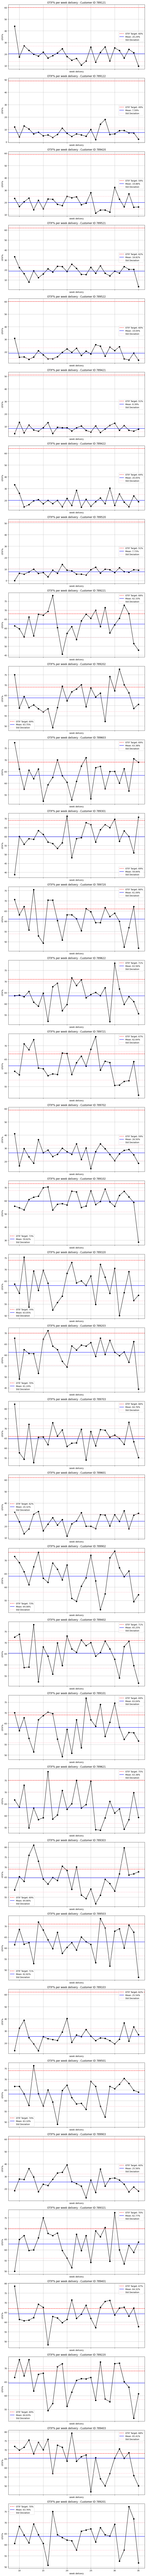

In [ ]:
fig, axs = plt.subplots(len(customers_list_by_ID), 1, figsize=(10, 5*len(customers_list_by_ID)), sharex=True)

for i, customer_id in enumerate(customers_list_by_ID):
    test = otif_by_customer_per_week.query('customer_id == @customer_id')
    ax = axs[i]
    otif_target = dim_target_orders.loc[dim_target_orders['customer_id'] == customer_id, 'otif_target%'].values[0]
    ax.axhline(y = otif_target, color='r', linestyle='--', label=f'OTIF Target: {otif_target}%')
    ax.plot(test.index.get_level_values('week_delivery'), test['otif%'], marker='o', color='black')
    ax.axhline(y = np.nanmean(test['otif%']), color='blue', linestyle='-', label=f'Mean: {np.nanmean(test["otif%"]):.2f}%')
    ax.axhline(y = np.nanmean(test['otif%']) + np.nanstd(test['otif%']), color='pink', linestyle='--', label='Std Deviation')
    ax.axhline(y = np.nanmean(test['otif%']) - np.nanstd(test['otif%']), color='pink', linestyle='--')
    ax.set_xlabel('week delivery')
    ax.set_ylabel('OTIF%')
    ax.set_title(f'OTIF% per week delivery - Customer ID {customer_id}')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


***OBSERVATION:***

In some customer accounts, there is evidence of low levels of On-Time-In-Full (OTIF%) performance, which are significantly below their target metrics. However, it is important to note that OTIF% is a composite metric composed of two individual metrics. Therefore, it is crucial to determine if either of the two individual metrics has a more significant impact on performance.

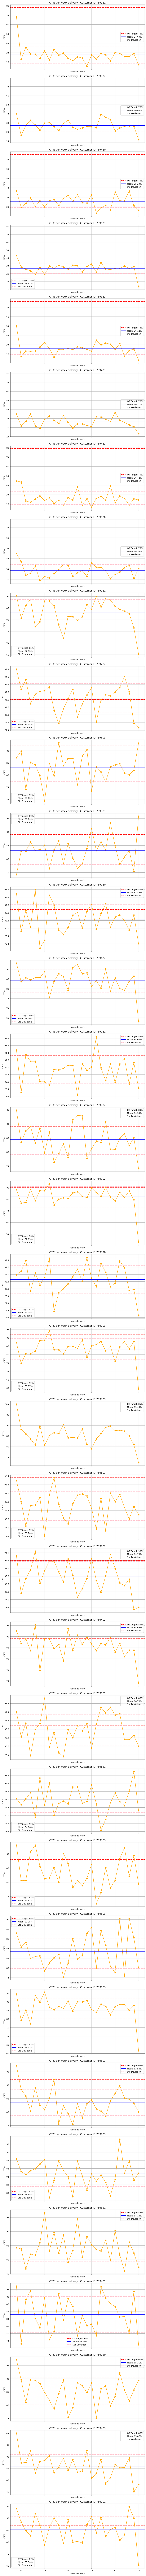

In [ ]:
ot_by_customer_per_week = fact_order_lines_copy1.groupby(['customer_id', 'week_delivery']).agg({'order_id': 'count', 'On Time': 'sum'})
ot_by_customer_per_week['ot%'] = round((ot_by_customer_per_week['On Time']/ot_by_customer_per_week['order_id'])*100,2)

fig, axs = plt.subplots(len(customers_list_by_ID), 1, figsize=(10, 5*len(customers_list_by_ID)), sharex=True)

for i, customer_id in enumerate(customers_list_by_ID):
    test1 = ot_by_customer_per_week.query('customer_id == @customer_id')
    ax1 = axs[i]
    ot_target = dim_target_orders.loc[dim_target_orders['customer_id'] == customer_id, 'ontime_target%'].values[0]
    ax1.axhline(y = ot_target, color='r', linestyle='--', label=f'OT Target: {ot_target}%')
    ax1.plot(test.index.get_level_values('week_delivery'), test1['ot%'], marker='o', color = 'orange')
    ax1.axhline(y = np.nanmean(test1['ot%']), color='blue', linestyle='-', label=f'Mean: {np.nanmean(test1["ot%"]):.2f}%')
    ax1.axhline(y = np.nanmean(test1['ot%']) + np.nanstd(test1['ot%']), color='pink', linestyle='--', label='Std Deviation')
    ax1.axhline(y = np.nanmean(test1['ot%']) - np.nanstd(test1['ot%']), color='pink', linestyle='--')
    ax1.set_xlabel('week delivery')
    ax1.set_ylabel('OT%')
    ax1.set_title(f'OT% per week delivery - Customer ID {customer_id}')
    ax1.grid(True)
    ax1.legend()

plt.tight_layout()
plt.show()

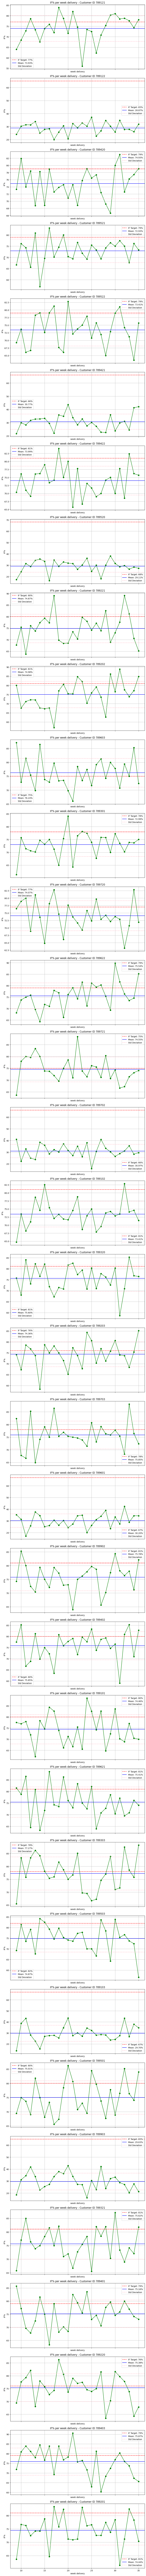

In [ ]:
if_by_customer_per_week = fact_order_lines_copy1.groupby(['customer_id', 'week_delivery']).agg({'order_id': 'count', 'In Full': 'sum'})
if_by_customer_per_week['if%'] = round((if_by_customer_per_week['In Full']/ot_by_customer_per_week['order_id'])*100,2)

fig, axs = plt.subplots(len(customers_list_by_ID), 1, figsize=(10, 5*len(customers_list_by_ID)), sharex=True)

for i, customer_id in enumerate(customers_list_by_ID):
    test2 = if_by_customer_per_week.query('customer_id == @customer_id')
    ax2 = axs[i]
    if_target = dim_target_orders.loc[dim_target_orders['customer_id'] == customer_id, 'infull_target%'].values[0]
    ax2.axhline(y = if_target, color='r', linestyle='--', label=f'IF Target: {if_target}%')
    ax2.plot(test.index.get_level_values('week_delivery'), test2['if%'], marker='o', color = 'green')
    ax2.axhline(y = np.nanmean(test2['if%']), color='blue', linestyle='-', label=f'Mean: {np.nanmean(test2["if%"]):.2f}%')
    ax2.axhline(y = np.nanmean(test2['if%']) + np.nanstd(test2['if%']), color='pink', linestyle='--', label='Std Deviation')
    ax2.axhline(y = np.nanmean(test2['if%']) - np.nanstd(test2['if%']), color='pink', linestyle='--')
    ax2.set_xlabel('week delivery')
    ax2.set_ylabel('IF%')
    ax2.set_title(f'IF% per week delivery - Customer ID {customer_id}')
    ax2.grid(True)
    ax2.legend()

plt.tight_layout()
plt.show()

# ***Insight #3:***

To ensure accuracy, let's review the customer codes step-by-step and compare the metrics for each user. It has come to our attention that the following accounts: 789122, 789420, 789522, 789421, 789422, 789520, 789601, and 789903 are experiencing serious issues with delivery, specifically with delays and incomplete shipments. These problems have persisted over a significant period of time, indicating consistent supply chain challenges.

Similarly, the accounts 789121, 789521, 789603, 789702, 789621, 789503, 789103, and 789501 are facing challenges with incomplete deliveries, which are adversely impacting our key performance indicator (KPI) and customer relationships.

At this juncture, it is crucial to assess whether our KPIs are directly correlated with specific products.

In [ ]:
dim_products = pd.read_csv('/content/dim_products.csv')

for index, row in fact_order_lines_copy1.iterrows():
    product_id = row['product_id']
    product_name = dim_products[dim_products['product_id'] == product_id]['product_name'].values
    product_category = dim_products[dim_products['product_id'] == product_id]['category'].values
    if len(product_name) > 0:
        fact_order_lines_copy1.at[index, 'product_name'] = product_name[0]
        fact_order_lines_copy1.at[index, 'category'] = product_category[0]

In [ ]:
fact_order_lines_copy1

order_id order_placement_date  customer_id  product_id  order_qty  \
0        FMR34203601           2022-03-01       789203    25891601        110   
1        FMR32320302           2022-03-01       789320    25891203        347   
2        FMR33320501           2022-03-01       789320    25891203        187   
3        FMR34220601           2022-03-01       789220    25891203        235   
4        FMR33703603           2022-03-01       789703    25891203        176   
...              ...                  ...          ...         ...        ...   
57091  FAUG831420303           2022-08-30       789420    25891303         24   
57092  FAUG831122303           2022-08-30       789122    25891303         67   
57093  FAUG831702303           2022-08-30       789702    25891303         41   
57094  FAUG831221503           2022-08-30       789221    25891303         92   
57095  FAUG831202303           2022-08-30       789202    25891303         29   

             agreed_delivery_date actual_delivery_date  delivery_qty  In Full  \
0           Friday, March 4, 2022           2022-03-04           110        1   
1        Wednesday, March 2, 2022           2022-03-02           347        1   
2         Thursday, March 3, 2022           2022-03-03           150        0   
3           Friday, March 4, 2022           2022-03-04           235        1   
4         Thursday, March 3, 2022           2022-03-03           176        1   
...                           ...                  ...           ...      ...   
57091  Wednesday, August 31, 2022           2022-08-30            24        1   
57092  Wednesday, August 31, 2022           2022-08-31            54        0   
57093  Wednesday, August 31, 2022           2022-08-30            37        0   
57094  Wednesday, August 31, 2022           2022-08-31            83        0   
57095  Wednesday, August 31, 2022           2022-09-01            29        1   

       On Time  On Time In Full Month_delivery  week_delivery   product_name  \
0            1                1          March              9     AM Tea 500   
1            1                1          March              9  AM Butter 500   
2            1                0          March              9  AM Butter 500   
3            1                1          March              9  AM Butter 500   
4            1                1          March              9  AM Butter 500   
...        ...              ...            ...            ...            ...   
57091        1                1         August             35    AM Ghee 100   
57092        1                0         August             35    AM Ghee 100   
57093        1                0         August             35    AM Ghee 100   
57094        1                0         August             35    AM Ghee 100   
57095        0                0      September             35    AM Ghee 100   

        category  
0      beverages  
1          Dairy  
2          Dairy  
3          Dairy  
4          Dairy  
...          ...  
57091      Dairy  
57092      Dairy  
57093      Dairy  
57094      Dairy  
57095      Dairy  

[57096 rows x 15 columns]

In [ ]:
metrics_per_product = fact_order_lines_copy1.groupby(['product_id','product_name', 'week_delivery']).agg({'order_id': 'count', 'In Full': 'sum','On Time': 'sum',
                                                                                                          'order_qty':'sum','delivery_qty':'sum'})
metrics_per_product['ontime%'] = round((metrics_per_product['On Time']/metrics_per_product['order_id'])*100,2)
metrics_per_product['LIFR%'] = round((metrics_per_product['In Full']/metrics_per_product['order_id'])*100,2)
metrics_per_product['VOFR%'] = round((metrics_per_product['delivery_qty']/metrics_per_product['order_qty'])*100,2)
metrics_per_product

order_id  In Full  On Time  order_qty  \
product_id product_name week_delivery                                          
25891101   AM Milk 500  9                    67       52       56      26378   
                        10                  113       83       75      44929   
                        11                  113       76       83      45220   
                        12                  127       78       94      50668   
                        13                  118       80       87      48292   
...                                         ...      ...      ...        ...   
25891603   AM Tea 100   31                  111       76       78      13319   
                        32                  117       83       82      15110   
                        33                  132       81       92      16840   
                        34                  116       79       81      13372   
                        35                   56       32       36       6872   

                                       delivery_qty  ontime%  LIFR%  VOFR%  
product_id product_name week_delivery                                       
25891101   AM Milk 500  9                     25787    83.58  77.61  97.76  
                        10                    43789    66.37  73.45  97.46  
                        11                    43671    73.45  67.26  96.57  
                        12                    48654    74.02  61.42  96.03  
                        13                    46815    73.73  67.80  96.94  
...                                             ...      ...    ...    ...  
25891603   AM Tea 100   31                    12938    70.27  68.47  97.14  
                        32                    14686    70.09  70.94  97.19  
                        33                    16297    69.70  61.36  96.78  
                        34                    12907    69.83  68.10  96.52  
                        35                     6575    64.29  57.14  95.68  

[486 rows x 8 columns]

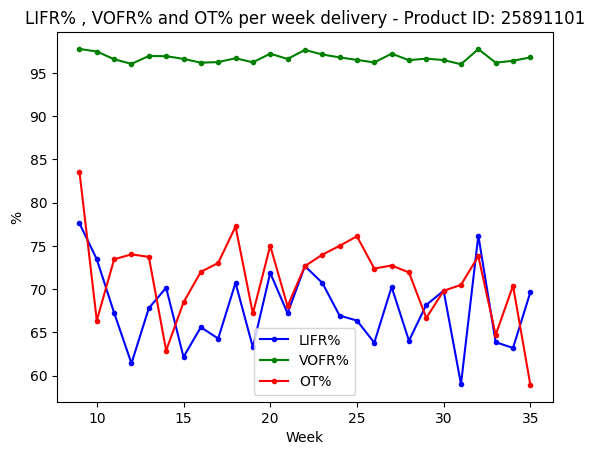

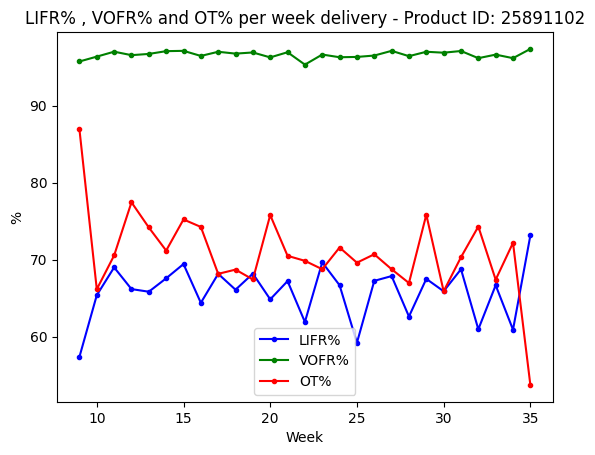

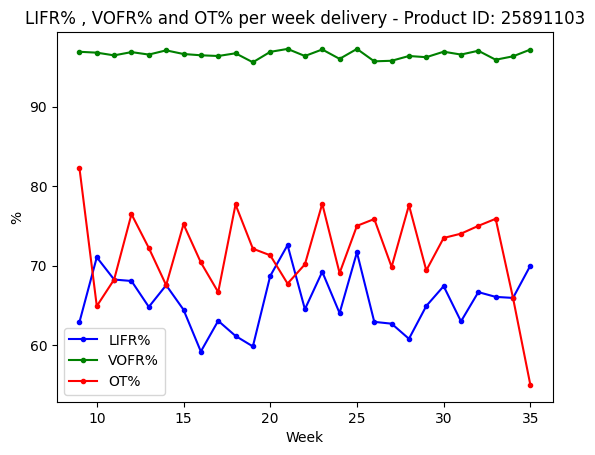

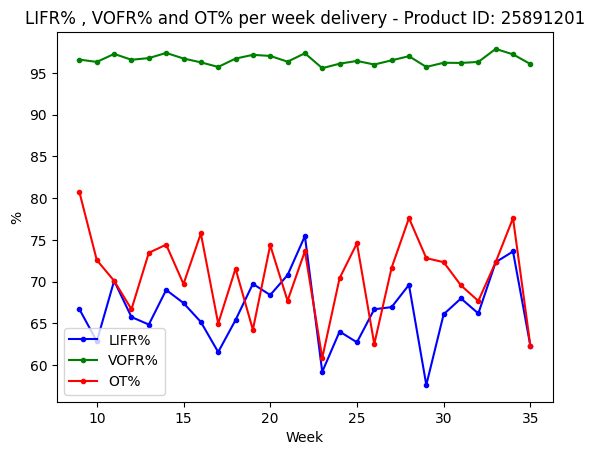

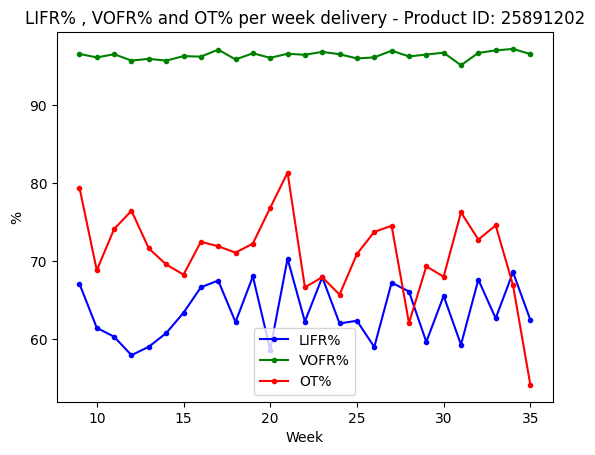

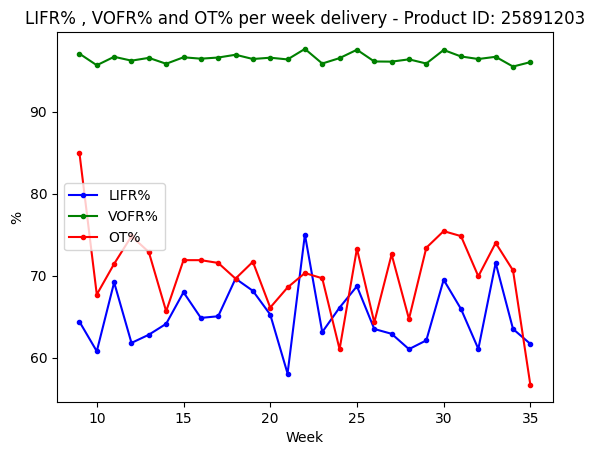

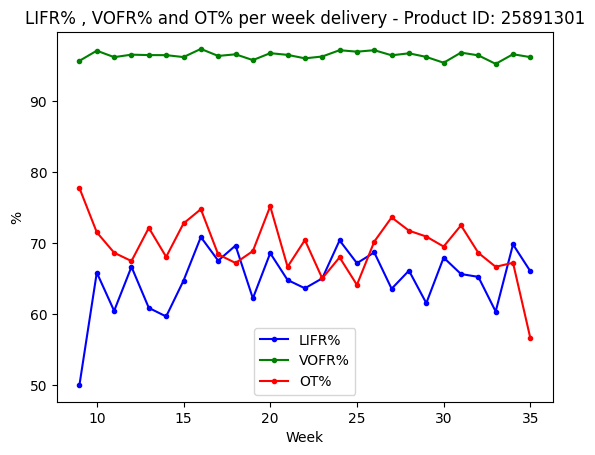

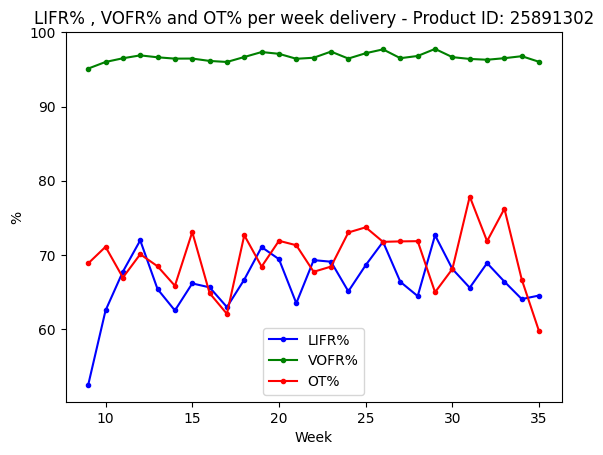

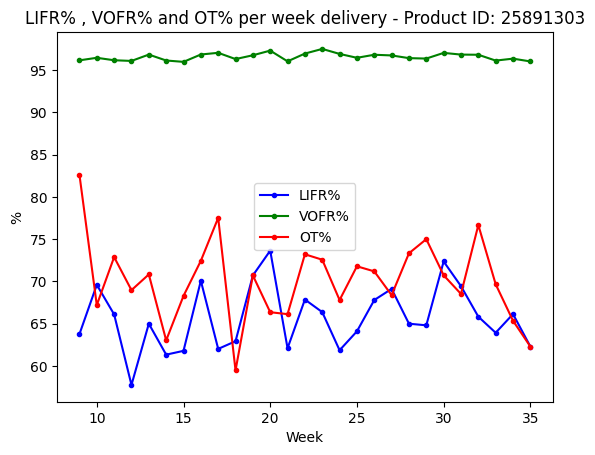

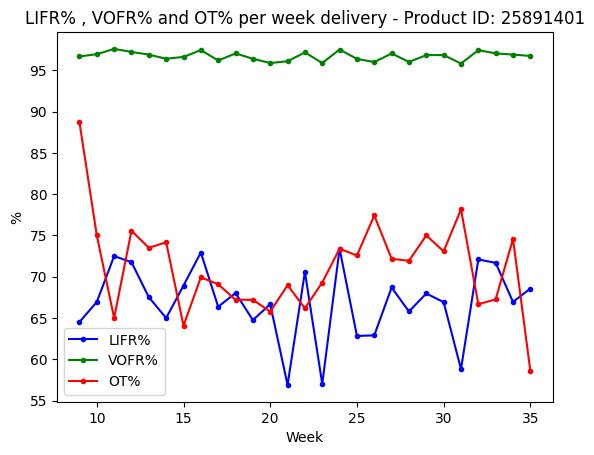

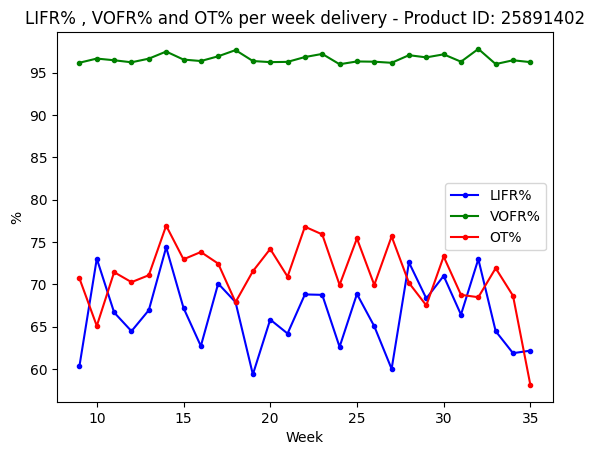

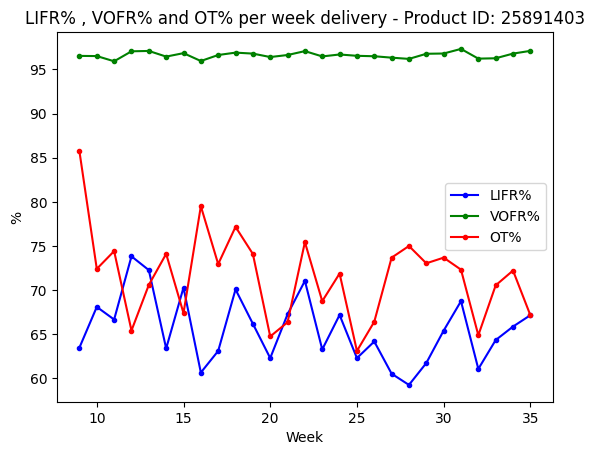

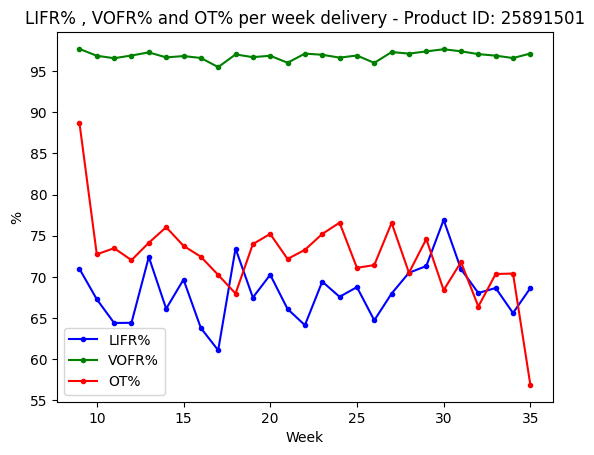

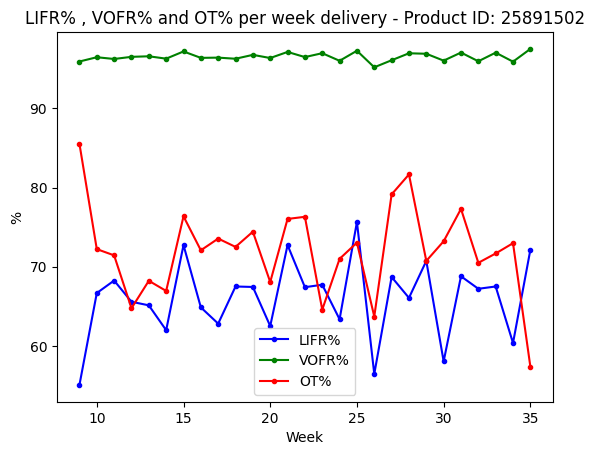

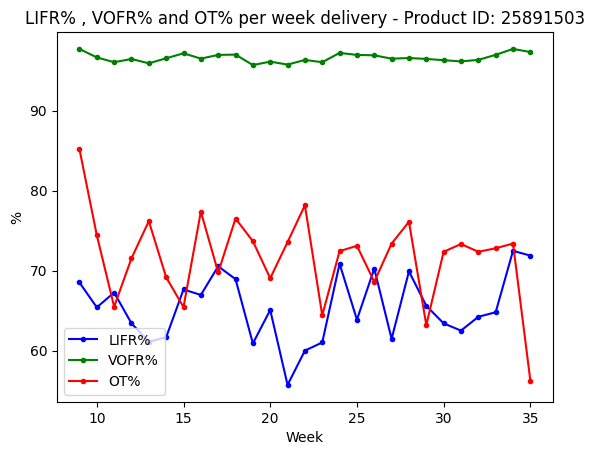

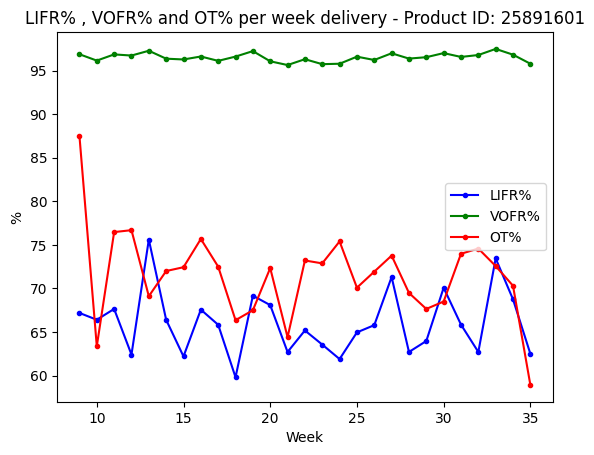

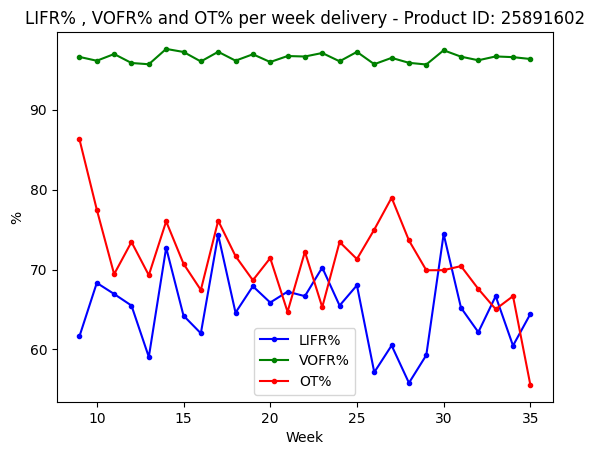

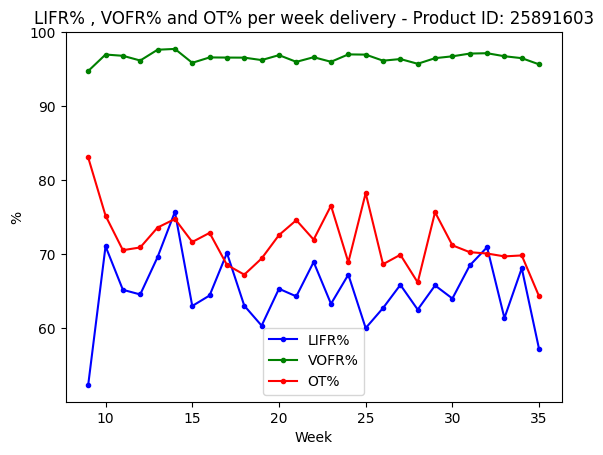

In [ ]:
product_ids = metrics_per_product.index.get_level_values('product_id').unique()
for product_id in product_ids:
    product_df = metrics_per_product[metrics_per_product.index.get_level_values('product_id') == product_id]
    week_delivery = product_df.index.get_level_values('week_delivery')
    lifr,vofr = product_df['LIFR%'],product_df['VOFR%']
    plt.plot(week_delivery, lifr, '.-', color='blue', label='LIFR%')
    plt.plot(week_delivery, vofr, '.-', color='green', label='VOFR%')
    plt.plot(week_delivery, product_df['ontime%'], '.-', color='red', label='OT%')
    plt.xlabel('Week')
    plt.ylabel('%')
    plt.title(f'LIFR% , VOFR% and OT% per week delivery - Product ID: {product_id}')
    plt.legend()
    plt.show()


# **INSIGHT #4:**
Upon reviewing the last graphs, we have come to the conclusion that we lack quantitative evidence to determine if our problem lies in the complete order quantity. Currently, all our products are at approximately 60% - 70% of the LIFR% (Lead-time Inventory Fill Rate), but all our orders have already reached 95% in VOFR%. Furthermore, this percentage has remained stable over a long period of time. Hence, we can conclude that our problem lies in the supply chain, specifically in the preparation and dispatch of products to the final customer.

In [ ]:
for index, row in fact_order_lines_copy1.iterrows():
  city_name = dim_customers[dim_customers['customer_id'] == row['customer_id']]['city'].values
  if len(product_name) > 0:
      fact_order_lines_copy1.at[index, 'city'] = city_name[0]

In [ ]:
metrics_per_product_and_city = fact_order_lines_copy1.groupby(['city','product_name','week_delivery']).agg({'order_id': 'count', 'In Full': 'sum','On Time': 'sum',
                                                                                                          'order_qty':'sum','delivery_qty':'sum'})
metrics_per_product_and_city['ontime%'] = round((metrics_per_product_and_city['On Time']/metrics_per_product_and_city['order_id'])*100,2)
metrics_per_product_and_city['LIFR%'] = round((metrics_per_product_and_city['In Full']/metrics_per_product_and_city['order_id'])*100,2)
metrics_per_product_and_city['VOFR%'] = round((metrics_per_product_and_city['delivery_qty']/metrics_per_product_and_city['order_qty'])*100,2)
metrics_per_product_and_city

order_id  In Full  On Time  \
city      product_name    week_delivery                               
Ahmedabad AM Biscuits 250 9                    16       11       15   
                          10                   51       34       39   
                          11                   40       23       29   
                          12                   49       30       34   
                          13                   41       29       33   
...                                           ...      ...      ...   
Vadodara  AM Tea 500      31                   43       25       32   
                          32                   39       22       24   
                          33                   42       34       29   
                          34                   41       30       31   
                          35                   25       11       14   

                                         order_qty  delivery_qty  ontime%  \
city      product_name    week_delivery                                     
Ahmedabad AM Biscuits 250 9                   2817          2764    93.75   
                          10                  8655          8358    76.47   
                          11                  7159          6755    72.50   
                          12                  8461          8117    69.39   
                          13                  7579          7310    80.49   
...                                            ...           ...      ...   
Vadodara  AM Tea 500      31                  5166          4942    74.42   
                          32                  4593          4400    61.54   
                          33                  5081          5003    69.05   
                          34                  4642          4542    75.61   
                          35                  2897          2730    56.00   

                                         LIFR%  VOFR%  
city      product_name    week_delivery                
Ahmedabad AM Biscuits 250 9              68.75  98.12  
                          10             66.67  96.57  
                          11             57.50  94.36  
                          12             61.22  95.93  
                          13             70.73  96.45  
...                                        ...    ...  
Vadodara  AM Tea 500      31             58.14  95.66  
                          32             56.41  95.80  
                          33             80.95  98.46  
                          34             73.17  97.85  
                          35             44.00  94.24  

[1458 rows x 8 columns]

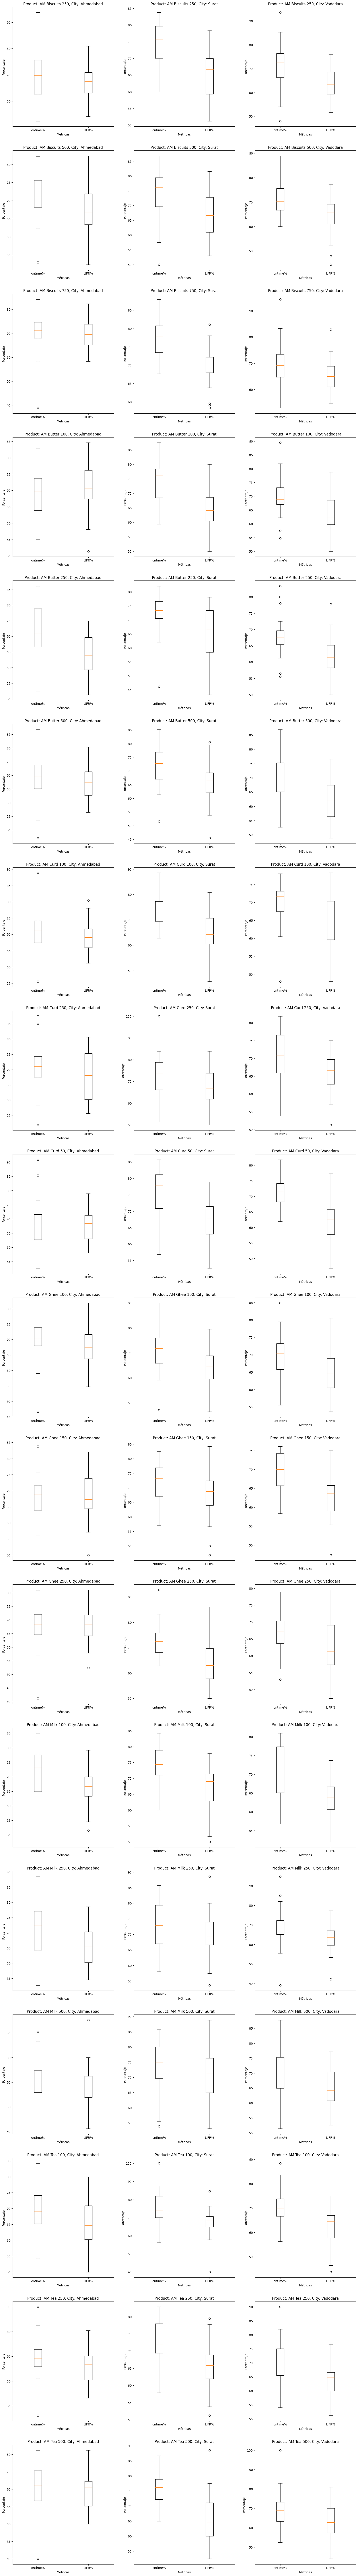

In [ ]:
cities = metrics_per_product_and_city.index.get_level_values('city').unique().tolist()
products = metrics_per_product_and_city.index.get_level_values('product_name').unique().tolist()

fig, axes = plt.subplots(len(products),len(cities), figsize=(20,150))

for i, product_name in enumerate(products):
    for j, city in enumerate(cities):
        ax = axes[i][j]  # Seleccionar el subplot correspondiente
        data = metrics_per_product_and_city.loc[(city, product_name)]  # Obtener los datos del dataframe
        ax.boxplot([data['ontime%'], data['LIFR%']], labels=['ontime%', 'LIFR%'])  # Graficar cajas de ontime% y LIFR%
        ax.set_title(f'Product: {product_name}, City: {city}')  # Agregar título al subplot
        ax.set_xlabel('Métricas')  # Agregar etiqueta al eje x
        ax.set_ylabel('Porcentaje')  # Agregar etiqueta al eje y

plt.subplots_adjust(hspace=0.2)
plt.show()



## **CONCLUSIONS**

Upon analyzing the performance of each product, we have determined that Surat City is facing significant supply chain challenges with complete orders, with an alarming rate of 90% across all product ranges. The graphs and boxplots reveal two major issues:

1. High Volatility: The boxplots for Surat City show a wide range, indicating instability in our product supply chain. This is adversely affecting our customers, particularly in economic terms.  each range have already 40% in LIFR%

2. Vadodara City is also experiencing problems with incomplete orders for specific products, including Butter 500, Curd 100, and Ghee 100, Ghee 250.

3. Our product, Milk 100, has encountered delivery and production issues in all cities.

4. In light of these findings, we urge the Production and Logistics departments to thoroughly analyze and review the manufacturing lines for the following products: Biscuits 750, Butter 100, Butter 250, Butter 500, Curd 100, Curd 50, Ghee 100, and Ghee 250.